In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Questão 17



## 1) Entrar os coeficientes

In [40]:
A = [[8,6],[1,2], [-1,-2]]
B = [48, 12, -20]
C = [0.06, 0.08]
prob = 'min'
ineq = []
non_negative = True

## 2) printar a função objetiva e as restrições

In [47]:
def f_a(A, B, C, prob, ineq, non_negative=True) -> None:
    ineq = []

    if not ineq:
        if prob == 'max':
            ineq = ['<='] * len(B)
        elif prob == 'min':
            ineq = ['>='] * len(B)

    print(f"Otimização de:  {prob} Z = {C[0]}x + {C[1]}y")

    print("\nSujeito a:")
    for i in range(len(A)):
        print(f"        {A[i][0]}x + {A[i][1]}y {ineq[i]} {B[i]}")
    
    if non_negative:
        print("\n Tal que: x, y >= 0")

    return None

In [48]:
f_a(A, B, C, prob, ineq, non_negative)

Otimização de:  min Z = 0.06x + 0.08y

Sujeito a:
        8x + 6y >= 48
        1x + 2y >= 12
        -1x + -2y >= -20

 Tal que: x, y >= 0


## 3) printar a função objetiva e as restrições

### Melhorar essa etapa do codigo, pois ainda nao usa os coeficientes, essa etapa é hard code

Text(0, 0.5, '$y$')

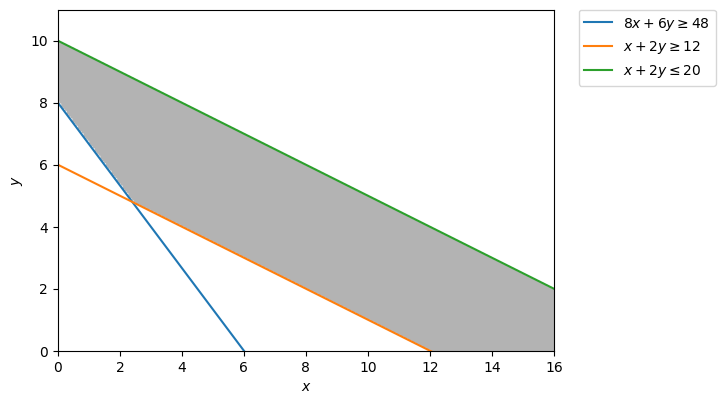

In [103]:
d = np.linspace(-2,16,300)

x,y = np.meshgrid(d,d)

plt.imshow( ((6*y >= (48 - 8*x)) & # 8x1 + 6x2 >= 48
             (2*y >= (12 - x)) & # x1 + 2x2 >= 12
             (-2*y >= (-20 + x))  # x1 + 2x2 <= 20
             ).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
#Dado que x = x1 
#         y = x2

x = np.linspace(0, 16, 2000)

# 8x1 + 6x2 >= 48
y1 = (48 - 8*x)/6.0
#x1 + 2x2 = 12
y2 = (12 - x)/2.0
#x1 + 2x2 = 20
y3 = (20 - x)/2.0

# Make plot
#plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y1, label=r'$8x + 6y \geq 48$')
plt.plot(x, y2, label=r'$x + 2y \geq 12$')
plt.plot(x, y3, label=r'$x + 2y \leq 20$')
plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## 4) Calcular as interseções

In [104]:
from intvalpy import lineqs
import numpy as np

A = np.array(A)
b = np.array(B)

dots = lineqs(A, b, save=False, show=False)

In [105]:
print(dots)

[[ 2.4  4.8]
 [-2.4 11.2]
 [16.   2. ]
 [16.  -2. ]]


## 5) Calcular os calores da função objetica

In [106]:
print(f"Dado: Z = {C[0]}x + {C[1]}y \n")

z_solutions = {}
x_list = []
for dot in dots:
    solution = round(C[0]*dot[0] + C[1]*dot[1], 4)
    ponto = f"{dot[0]},{dot[1]}"
    z_solutions.update({solution: ponto})
    
    print(f"Z({ponto}) = {solution}")

Dado: Z = 0.06x + 0.08y 

Z(2.4,4.8) = 0.528
Z(-2.4,11.2) = 0.752
Z(16.0,2.0) = 1.12
Z(16.0,-2.0) = 0.8


In [107]:
z_solutions

{0.528: '2.4,4.8', 0.752: '-2.4,11.2', 1.12: '16.0,2.0', 0.8: '16.0,-2.0'}

 ## 6) Retornar o valor de menor ou maior dependendo da otimizacao

In [108]:
max(z_solutions. values()) 

'2.4,4.8'

In [109]:
z_solutions[min(z_solutions)]

'2.4,4.8'

In [110]:
if prob == 'max':
    print(f"O valor maximo da zona factivel é {max(z_solutions)} encontrado no ponto Z({z_solutions[max(z_solutions)]})")
elif prob == 'min':
    print(f"O valor minimo da zona factivel é {min(z_solutions)} encontrado no ponto Z({z_solutions[min(z_solutions)]})")

O valor minimo da zona factivel é 0.528 encontrado no ponto Z(2.4,4.8)
